# Getting started

Here we will show a very basic example how to use grandPy to perform kinetic modeling. For more vignettes explore the [vignettes folder](
../vignettes/).

We will use data from [[1]](https://www.nature.com/articles/s41586-021-03610-3). These are SLAM-seq data from multiple time points (1h, 2h, 3h, 4h) after infecting Calu-3 cells with SARS-CoV-2 (or mock as control).

First we load the grandPy package and read the GRAND-SLAM that is part of the grandPy package:

In [16]:
import warnings
import grandpy as gp

warnings.filterwarnings("ignore", category=UserWarning)

sars = gp.read_grand("../data/sars_R.tsv", design=("Condition", "dur.4sU", "Replicate"))
sars = sars.normalize()
print(sars)

Detected dense format -> using dense reader
GrandPy:
Read from sars_R
1045 genes, 12 samples/cells
Available data slots: ['ntr', 'alpha', 'beta', 'count', 'norm']
Available analyses: []
Available plots: {}
Default data slot: norm



The GRAND-SLAM output normally contains any gene with at least 1 read, i.e. > 30k genes. The data set that is part of grandPy has been prefiltered and only consists of 1045 genes. For a complete workflow including filter see the [full vignette](vignette_02_kinetic_modeling.ipynb). Note that we also normalized the read counts (by using size factors), which added an additional data "slot".

<span style="color:red"> We can start by creating a plot showing the kinetics for a gene: ...</span>

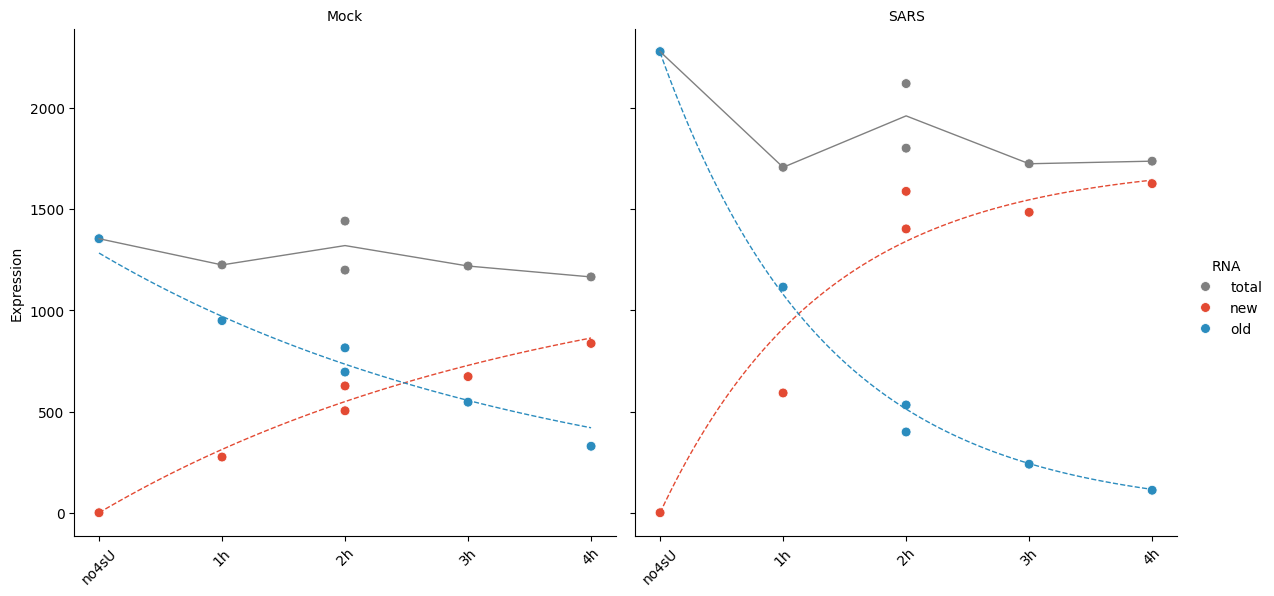

In [17]:
gp.plot_gene_progressive_timecourse(data=sars, gene="SRSF6", time="duration.4sU", steady_state={"Mock": True, "SARS": False}, exact_tics=True, size=50)
# debug print

<span style="color:red">Note that this automatically fit the kinetic model for this gene, separately for the two conditions. Modeling used the default data slot, which are the size-factor normalized values, as indicated above. By using the `steady.state` parameter, we defined the mock infected control samples to be in steady state, whereas the virus infected samples should not be assumed to be in steady state. </span>

<span style="color:red"> We now fit the kinetic model for all genes: </span>

In [18]:
sars = sars.fit_kinetics(slot="norm", time="duration.4sU", return_fields=["Synthesis","Degradation","Half-life"])

Fitting SARS: 100%|██████████| 1045/1045 [00:03<00:00, 314.89it/s]


Modeling results are stored in two “analysis tables”:

In [19]:
sars.analyses

['kinetics_Mock', 'kinetics_SARS']

We can retrieve this table (for more information, see the [data handling vignette](vignette_04_working_with_data_matrices_and_analysis_results)):

In [20]:
sars.get_analysis_table().head()

,Symbol,Gene,Length,Type,Mock_Synthesis,Mock_Degradation,Mock_Half-life,SARS_Synthesis,SARS_Degradation,SARS_Half-life
Symbol,,,,,,,,,,
UHMK1,UHMK1,ENSG00000152332,8478,Cellular,175.303203,0.092302,7.509571,312.386838,0.246338,2.813804
ATF3,ATF3,ENSG00000162772,2103,Cellular,34.018585,0.734623,0.943541,484.399168,0.743419,0.932378
PABPC4,PABPC4,ENSG00000090621,3592,Cellular,213.387547,0.106087,6.533790,525.268077,0.294881,2.350600
ROR1,ROR1,ENSG00000185483,5832,Cellular,193.670366,0.194885,3.556701,444.013524,0.409719,1.691764
ZC3H11A,ZC3H11A,ENSG00000058673,11825,Cellular,251.705725,0.291714,2.376121,694.366405,0.444680,1.558753


We can also easily plot the RNA half-lives of mock infected cells against virus infected cells:

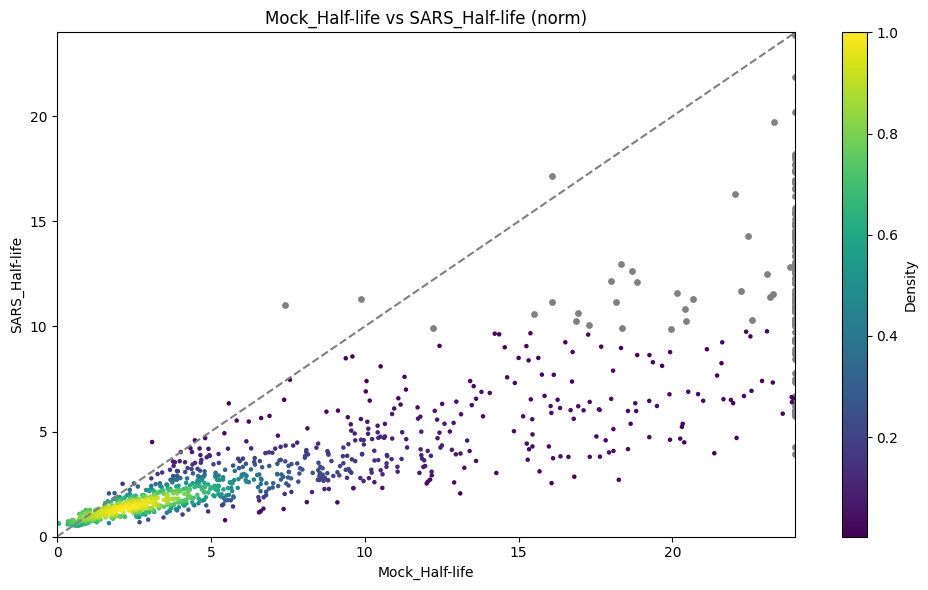

In [21]:
gp.plot_scatter(sars, x="Mock_Half-life", y="SARS_Half-life", limit=(0,24), diagonal=True)